In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import os
from tqdm.notebook import tqdm

In [317]:
import sys
import cv2
## sys.path.insert(0, r'D:\Research\images\[vg-images] Sample_1Dr_01')

In [318]:
path = 'clipped_samples_otsu'
image_list = os.listdir(path)

full_path = os.path.join(path, image_list[750])
img = Image.open(full_path).convert('RGB')
img_array = np.asarray(img)

In [319]:
label_ls = []

for i in tqdm(image_list):
    full_path = os.path.join(path, i)
    img = Image.open(full_path).convert('RGB')
    img_array = np.asarray(img)
    ### gray image (1-dimension)
    gray = cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)
    ### find all contours
    contours, hierarchy = cv2.findContours(gray,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    img_label = 0
    for j in range(len(contours)):
        x, y, w, h = cv2.boundingRect(contours[j])
        ### 如果middle point 是黑色 认为是pole
        if gray[int(y+h/2), int(x+w/2)] == 0:
            ### pole 离surface很近 不能算
            if gray[int(y-h/2), int(x+w/2)] != 0:
                if h*w > 20:
                    img_label += 1
    label_ls.append(img_label)

  0%|          | 0/4046 [00:00<?, ?it/s]

In [320]:
np.where(np.array(label_ls) > 14)

(array([269, 322], dtype=int64),)

In [280]:
### save the result
np.save('label_01.npy', np.where(np.array(label_ls) == 0, 0, 1))

### check the result

In [321]:
full_path = os.path.join(path, image_list[237])
img = Image.open(full_path).convert('RGB')
img_array = np.asarray(img)

In [322]:
gray = cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)

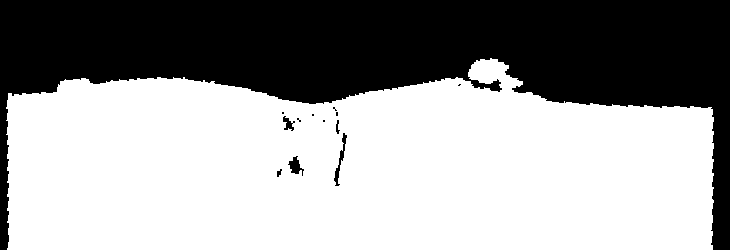

In [323]:
Image.fromarray(gray)

In [324]:
contours, hierarchy = cv2.findContours(gray,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [325]:
len(contours)

16

In [326]:
contours_2 = []
for j in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[j])
    ### 如果middle point 是黑色 认为是pole
    if gray[int(y+h/2), int(x+w/2)] == 0:
        ### pole 离surface很近 不能算
        if gray[int(y-h/2), int(x+w/2)] != 0:
            if h*w > 10:
                contours_2.append(contours[j])

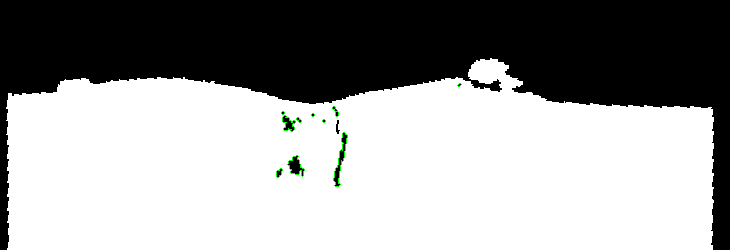

In [327]:
img_array = np.asarray(img)
Image.fromarray(cv2.drawContours(img_array, contours_2,-1,(0,255,0),1))

In [315]:
label_ls = []

for i in tqdm(image_list):
    full_path = os.path.join(path, i)
    img = Image.open(full_path).convert('RGB')
    img_array = np.asarray(img)
    ### gray image (1-dimension)
    gray = cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)
    ### find all contours
    contours, hierarchy = cv2.findContours(gray,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    contours_2 = []
    for j in range(len(contours)):
        x, y, w, h = cv2.boundingRect(contours[j])
        ### 如果middle point 是黑色 认为是pole
        if gray[int(y+h/2), int(x+w/2)] == 0:
            ### pole 离surface很近 不能算
            if gray[int(y-h/2), int(x+w/2)] != 0:
                if h*w > 10:
                    contours_2.append(contours[j])
    
    Image.fromarray(cv2.drawContours(img_array, contours_2,-1,(0,255,0),1)).save('clipped_samples_otsu_label/' + i)

  0%|          | 0/4046 [00:00<?, ?it/s]

In [246]:
contours[9].shape, len(contours)

((35, 1, 2), 16)

In [194]:
x, y, w, h = cv2.boundingRect(contours[6])

In [195]:
gray[int(y+h/2), int(x+w/2)], h, w

(0, 4, 6)

In [214]:
Image.fromarray(gray[y-h:y+h,x:x+w])

In [217]:
gray[int(y-h/2), int(x+w/2)]

0

In [197]:
gray[int(y+h/2), int(x+w/2)]

0